# CIFAR Experiments

**Experiments on CIFAR dataset using variable Learning Rate Schedule & Adaptive Gradient Descent Algorithm**

* A CNN model is constructed to train on CIFAR-10 
* Only tesing on two classes - cats and dogs 

* The following learning rate decay schedules are used : 

    - Experiment 1: constant learning rate
    - Experiment 2: time-based decay
    - Experiment 3: step decay
    - Experiment 4: exponential decay

* The following adaptive gradient descent algorithms are used : 

    - Experiment 5: Adagrad
    - Experiment 6: Adadelta
    - Experiment 7: RMSProp
    - Experiment 8: Adam

* Model performance of above experiements are compared

In [1]:
import os
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline  

import keras
from keras import backend as K
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam
from keras.models import model_from_json
from keras.callbacks import LearningRateScheduler

### Load CIFAR-10 data

In [2]:
batch_size = 64
num_classes = 2
epochs = 80

# input image dimensions
img_rows, img_cols = 32, 32   

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()   

# Only look at cats [=3] and dogs [=5]
train_picks = np.ravel(np.logical_or(y_train==3,y_train==5))  
test_picks = np.ravel(np.logical_or(y_test==3,y_test==5))     

y_train = np.array(y_train[train_picks]==5,dtype=int)
y_test = np.array(y_test[test_picks]==5,dtype=int)

X_train = X_train[train_picks]
X_test = X_test[test_picks]

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 3, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(np.ravel(y_train), num_classes)
y_test = keras.utils.to_categorical(np.ravel(y_test), num_classes)

X_train shape: (10000, 32, 32, 3)
10000 train samples
2000 test samples


In [3]:
plots_dir = "cifar-plots"
os.makedirs(plots_dir,exist_ok=True)

### Build CNN model

In [4]:
def cnn_model() : 
    model = Sequential()
    model.add(Conv2D(4, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
    model.add(Conv2D(8, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    # print(model.summary())
    return(model)

### Plot Functions

In [5]:
#plot accuracy curves
def plot_fig(i, history):
    fig = plt.figure()
    plt.plot(range(1,epochs+1),history.history['val_accuracy'],label='validation')
    plt.plot(range(1,epochs+1),history.history['accuracy'],label='training')
    plt.legend(loc=0)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.xlim([1,epochs])
    plt.grid(True)
    plt.title("Model Accuracy")
    plt.show()
    fig.savefig(os.path.join(plots_dir, str(i)+'-accuracy.jpg'))
    plt.close(fig)

In [6]:
#plot learning rates
def plot_lr_fig(i, history):
    fig = plt.figure()
    plt.plot(range(1,epochs+1),loss_history.lr,label='learning rate')
    plt.xlabel("epoch")
    plt.xlim([1,epochs+1])
    plt.ylabel("learning rate")
    plt.legend(loc=0)
    plt.grid(True)
    plt.title("Learning rate")
    plt.show()
    fig.savefig(os.path.join(plots_dir, str(i)+'-learning-rate.jpg'))
    plt.close(fig)

### Exp 1 - Constant learning rate

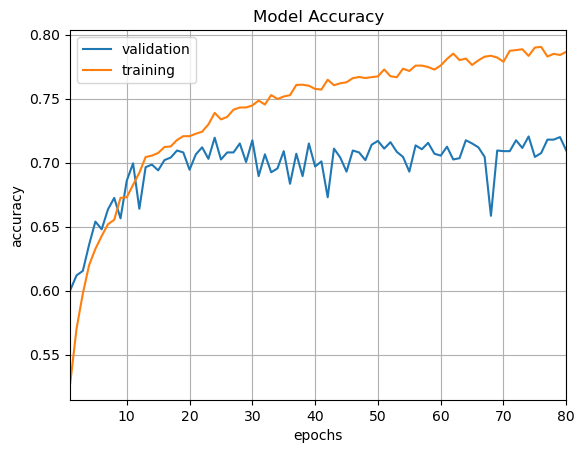

In [7]:
# define CNN model
model1 = cnn_model()

# define SGD optimizer
learning_rate = 0.1
sgd = SGD(learning_rate=learning_rate, momentum=0.0, decay=0.0, nesterov=False)

# compile the model
model1.compile(loss=keras.losses.categorical_crossentropy, optimizer=sgd, metrics=['accuracy'])

# fit the model
history1 = model1.fit(X_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=0,
                validation_data=(X_test, y_test))

# plot model accuracy
plot_fig(1, history1)

### Exp 2 -Time-based decay

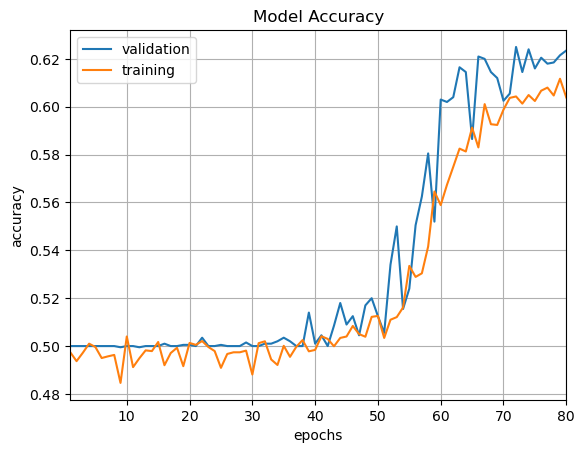

In [8]:
# define CNN model
model2 = cnn_model()

# define SGD optimizer
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.5
sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

# compile the model
model2.compile(loss=keras.losses.categorical_crossentropy, optimizer=sgd, metrics=['accuracy'])

# fit the model
history2 = model2.fit(X_train, y_train, 
                     epochs=epochs, 
                     batch_size=batch_size,
                     verbose=0, 
                     validation_data=(X_test, y_test))

# plot model accuracy
plot_fig(2, history2)

### Exp 3 - Step decay

lr: 0.1
lr: 0.1
lr: 0.1
lr: 0.1
lr: 0.1
lr: 0.1
lr: 0.1
lr: 0.1
lr: 0.1
lr: 0.05
lr: 0.05
lr: 0.05
lr: 0.05
lr: 0.05
lr: 0.05
lr: 0.05
lr: 0.05
lr: 0.05
lr: 0.05
lr: 0.025
lr: 0.025
lr: 0.025
lr: 0.025
lr: 0.025
lr: 0.025
lr: 0.025
lr: 0.025
lr: 0.025
lr: 0.025
lr: 0.0125
lr: 0.0125
lr: 0.0125
lr: 0.0125
lr: 0.0125
lr: 0.0125
lr: 0.0125
lr: 0.0125
lr: 0.0125
lr: 0.0125
lr: 0.00625
lr: 0.00625
lr: 0.00625
lr: 0.00625
lr: 0.00625
lr: 0.00625
lr: 0.00625
lr: 0.00625
lr: 0.00625
lr: 0.00625
lr: 0.003125
lr: 0.003125
lr: 0.003125
lr: 0.003125
lr: 0.003125
lr: 0.003125
lr: 0.003125
lr: 0.003125
lr: 0.003125
lr: 0.003125
lr: 0.0015625
lr: 0.0015625
lr: 0.0015625
lr: 0.0015625
lr: 0.0015625
lr: 0.0015625
lr: 0.0015625
lr: 0.0015625
lr: 0.0015625
lr: 0.0015625
lr: 0.00078125
lr: 0.00078125
lr: 0.00078125
lr: 0.00078125
lr: 0.00078125
lr: 0.00078125
lr: 0.00078125
lr: 0.00078125
lr: 0.00078125
lr: 0.00078125
lr: 0.000390625


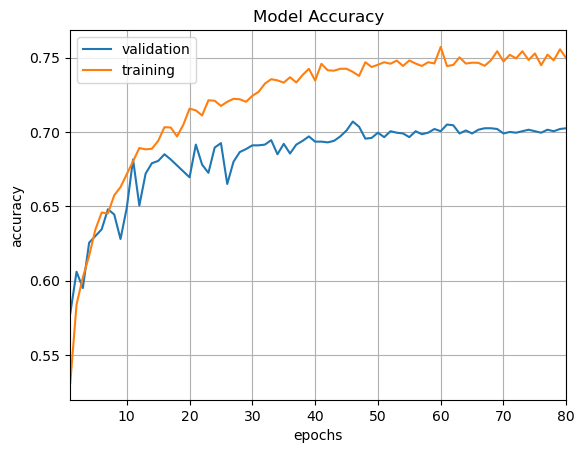

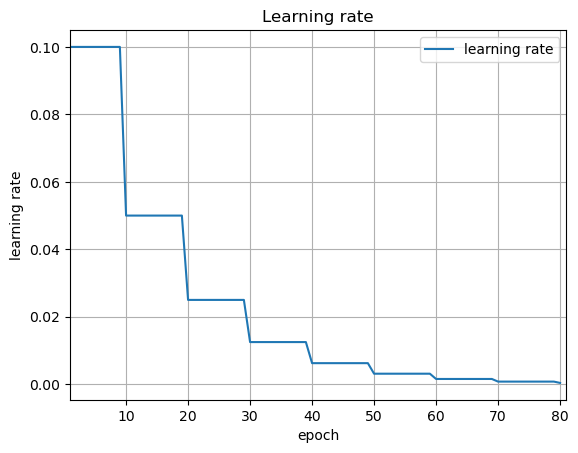

In [9]:
# define CNN model
model3 = cnn_model()

# define SGD optimizer
momentum = 0.5
sgd = SGD(learning_rate=0.0, momentum=momentum, decay=0.0, nesterov=False) 

# compile the model
model3.compile(loss=keras.losses.categorical_crossentropy,optimizer=sgd, metrics=['accuracy'])

# define step decay function
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.lr = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.lr.append(step_decay(len(self.losses)))
        print('lr:', step_decay(len(self.losses)))

def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((epoch)/epochs_drop))
    return lrate

# learning schedule callback
loss_history = LossHistory()
lrate = LearningRateScheduler(step_decay)
callbacks_list = [loss_history, lrate]

# fit the model
history3 = model3.fit(X_train, y_train, 
                     validation_data=(X_test, y_test), 
                     epochs=epochs, 
                     batch_size=batch_size, 
                     callbacks=callbacks_list, 
                     verbose=0)

# plot model accuracy
plot_fig(3, history3)

# plot learning rate
plot_lr_fig(3, loss_history)

### Exp 4 - Exponential decay

lr: 0.09048374180359596
lr: 0.0818730753077982
lr: 0.0740818220681718
lr: 0.06703200460356394
lr: 0.06065306597126335
lr: 0.05488116360940264
lr: 0.04965853037914095
lr: 0.044932896411722156
lr: 0.04065696597405991
lr: 0.036787944117144235
lr: 0.03328710836980796
lr: 0.030119421191220203
lr: 0.02725317930340126
lr: 0.024659696394160643
lr: 0.022313016014842982
lr: 0.02018965179946554
lr: 0.018268352405273462
lr: 0.016529888822158653
lr: 0.014956861922263504
lr: 0.013533528323661271
lr: 0.012245642825298192
lr: 0.011080315836233388
lr: 0.010025884372280372
lr: 0.009071795328941248
lr: 0.008208499862389881
lr: 0.007427357821433388
lr: 0.006720551273974976
lr: 0.006081006262521796
lr: 0.005502322005640721
lr: 0.004978706836786395
lr: 0.00450492023935578
lr: 0.0040762203978366215
lr: 0.0036883167401239995
lr: 0.003337326996032607
lr: 0.00301973834223185
lr: 0.0027323722447292562
lr: 0.002472352647033939
lr: 0.002237077185616559
lr: 0.002024191144580438
lr: 0.001831563888873418
lr: 0.001657

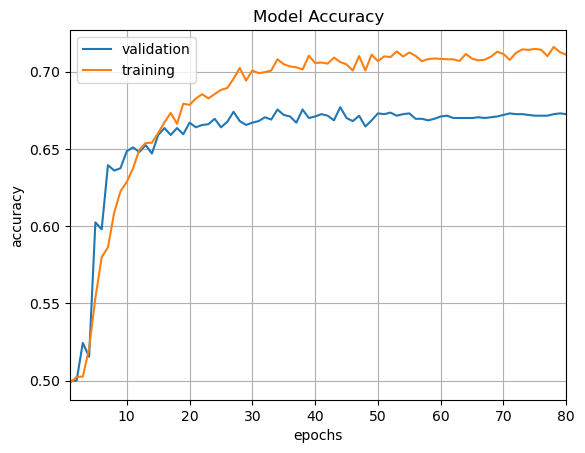

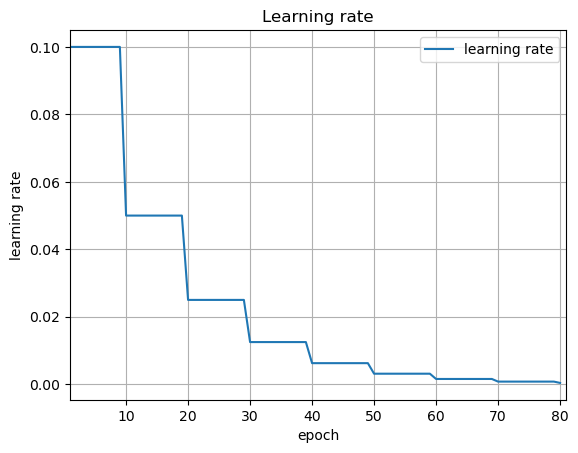

In [10]:
# define CNN model
model4 = cnn_model()

# define SGD optimizer
momentum = 0.8
sgd = SGD(learning_rate=0.0, momentum=momentum, decay=0.0, nesterov=False)

# compile the model
model4.compile(loss=keras.losses.categorical_crossentropy, optimizer=sgd, metrics=['accuracy'])

# define step decay function
class LossHistory_(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.lr = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.lr.append(exp_decay(len(self.losses)))
        print('lr:', exp_decay(len(self.losses)))

def exp_decay(epoch):
    initial_lrate = 0.1
    k = 0.1
    lrate = initial_lrate * np.exp(-k*epoch)
    return lrate

# learning schedule callback
loss_history_ = LossHistory_()
lrate_ = LearningRateScheduler(exp_decay)
callbacks_list_ = [loss_history_, lrate_]

# fit the model
history4 = model4.fit(X_train, y_train, 
     validation_data=(X_test, y_test), 
     epochs=epochs, 
     batch_size=batch_size, 
     callbacks=callbacks_list_, 
     verbose=0)

# plot model accuracy
plot_fig(4, history4)

# plot learning rate
plot_lr_fig(4, loss_history_)

### Exp 5 - Adaptive Gradient Descent Algorithms 

#### Optimizers : Adagrad, Adadelta, RMSprop, Adam

In [11]:
# fit CNN model using Adagrad optimizer
model5 = cnn_model()
model5.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adagrad(learning_rate=0.01, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])
history5 = model5.fit(X_train, y_train, 
                     validation_data=(X_test, y_test), 
                     epochs=epochs, 
                     batch_size=batch_size,
                     verbose=0)

In [12]:
# fit CNN model using Adadelta optimizer
model6 = cnn_model()
model6.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adadelta(learning_rate=1.0, rho=0.95, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])
history6 = model6.fit(X_train, y_train, 
                     validation_data=(X_test, y_test), 
                     epochs=epochs, 
                     batch_size=batch_size,
                     verbose=0)

In [13]:
# fit CNN model using RMSprop optimizer
model7 = cnn_model()
model7.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])
history7 = model7.fit(X_train, y_train, 
                     validation_data=(X_test, y_test), 
                     epochs=epochs, 
                     batch_size=batch_size,
                     verbose=0)

In [14]:
# fit CNN model using Adam optimizer
model8 = cnn_model()
model8.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])
history8 = model8.fit(X_train, y_train, 
                     validation_data=(X_test, y_test), 
                     epochs=epochs, 
                     batch_size=batch_size,
                     verbose=0)

### Compare model accuracy

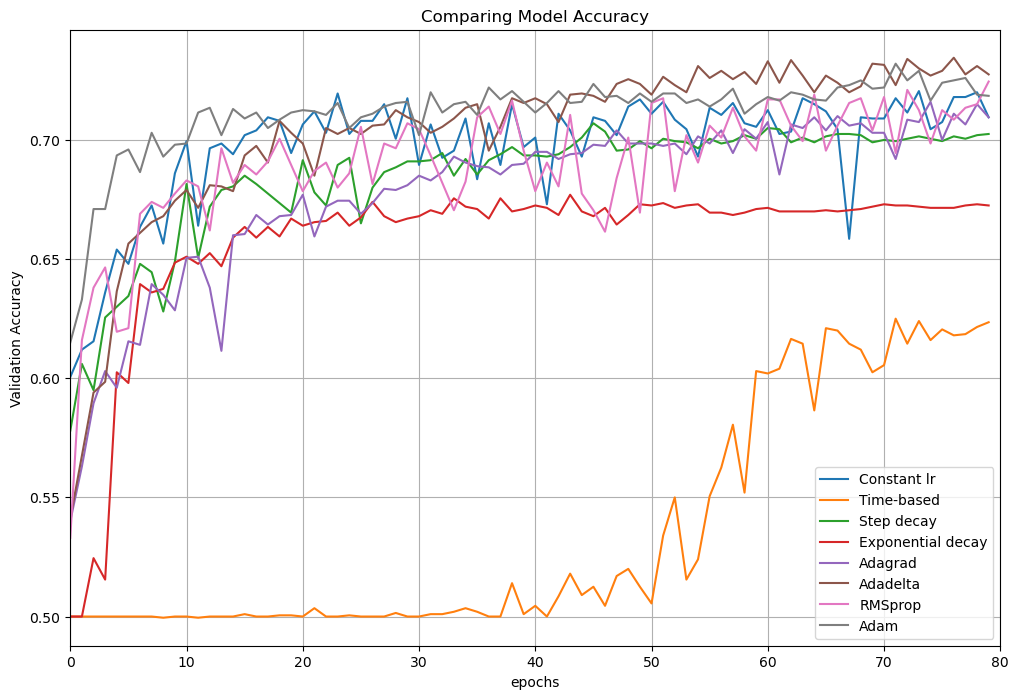

In [15]:
fig = plt.figure(figsize=(12,8))
plt.plot(range(epochs),history1.history['val_accuracy'],label='Constant lr')
plt.plot(range(epochs),history2.history['val_accuracy'],label='Time-based')
plt.plot(range(epochs),history3.history['val_accuracy'],label='Step decay')
plt.plot(range(epochs),history4.history['val_accuracy'],label='Exponential decay')
plt.plot(range(epochs),history5.history['val_accuracy'],label='Adagrad')
plt.plot(range(epochs),history6.history['val_accuracy'],label='Adadelta')
plt.plot(range(epochs),history7.history['val_accuracy'],label='RMSprop')
plt.plot(range(epochs),history8.history['val_accuracy'],label='Adam')
plt.legend(loc=0)
plt.xlabel('epochs')
plt.xlim([0,epochs])
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.title("Comparing Model Accuracy")
plt.show()
fig.savefig(os.path.join(plots_dir, 'compare-accuracy.jpg'))
plt.close(fig)

In [16]:
df = pd.DataFrame(columns=['Model', 'Training Loss', 'Training Accuracy', 'Test Loss', 'Test Accuracy'])
for idx, model in enumerate([model1,model2,model3,model4,model5,model6,model7,model8]):
    train_score = model.evaluate(X_train, y_train, verbose = 0)     
    test_score = model.evaluate(X_test, y_test, verbose = 0) 
    df.loc[len(df.index)] = [idx+1, train_score[0],train_score[1],test_score[0],test_score[1]] 

In [17]:
df

,Model,Training Loss,Training Accuracy,Test Loss,Test Accuracy
0,1.0,0.278042,0.9094,0.578714,0.7095
1,2.0,0.646412,0.6365,0.652312,0.6235
2,3.0,0.393076,0.8430,0.573022,0.7025
3,4.0,0.491970,0.7730,0.588325,0.6725
4,5.0,0.506036,0.7577,0.555072,0.7095
5,6.0,0.411510,0.8307,0.531382,0.7275
6,7.0,0.343473,0.8731,0.593422,0.7245
7,8.0,0.227776,0.9410,0.589096,0.7185
